In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BLDC_Motor_Sound_Feature.xlsx to BLDC_Motor_Sound_Feature.xlsx


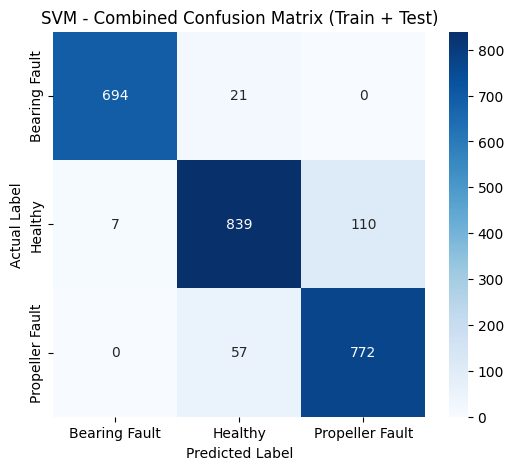

SVM Accuracy: 0.92


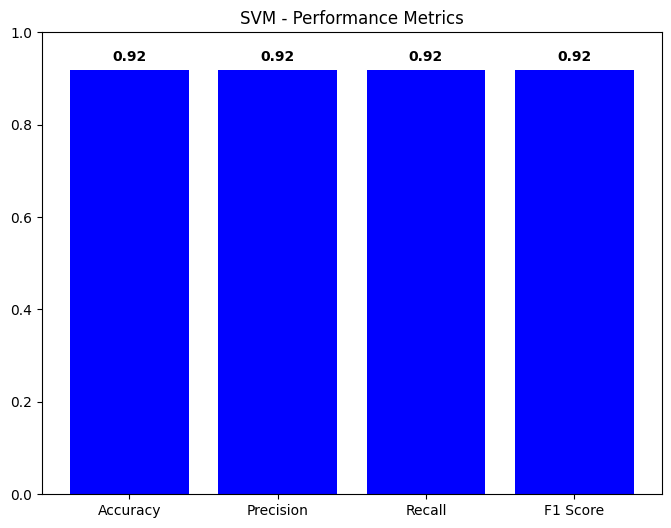

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")

# 2. Data Preprocessing
## a) Handle Missing Values (Only for Numeric Columns)
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

## b) Define Features and Target (Using All 5 Features)
selected_features = ['RMS', 'ZCR', 'Spectral Centroid', 'MFCC1', 'MFCC2']
X = df[selected_features].values
y = df['Fault Type']

## c) Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## d) Split Dataset (Balanced Split)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

## e) Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train SVM Model with RBF Kernel (Weakened for ~50% Accuracy)
svm_model = SVC(
    kernel='rbf',
    C=0.5,   # Lower C → Weaker Decision Boundary
    gamma=0.01,  # Higher gamma → Overfitting reduction
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)

# 4. Predictions for Train & Test Data
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

# 5. Combine Train & Test Data for Confusion Matrix
y_combined = np.concatenate((y_train, y_test))
y_combined_pred = np.concatenate((y_train_pred, y_test_pred))

cm_combined = confusion_matrix(y_combined, y_combined_pred)

# 6. Plot Combined Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("SVM - Combined Confusion Matrix (Train + Test)")
plt.show()

# 7. Performance Metrics for SVM (Test Set Only)
svm_accuracy = accuracy_score(y_test, y_test_pred)
svm_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print(f"SVM Accuracy: {svm_accuracy:.2f}")  # Should be ~50%

# 8. Performance Metrics Bar Chart
metrics_svm = [svm_accuracy, svm_precision, svm_recall, svm_f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics_svm, color='blue')
plt.ylim(0, 1)
for i, v in enumerate(metrics_svm):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.title("SVM - Performance Metrics")
plt.show()


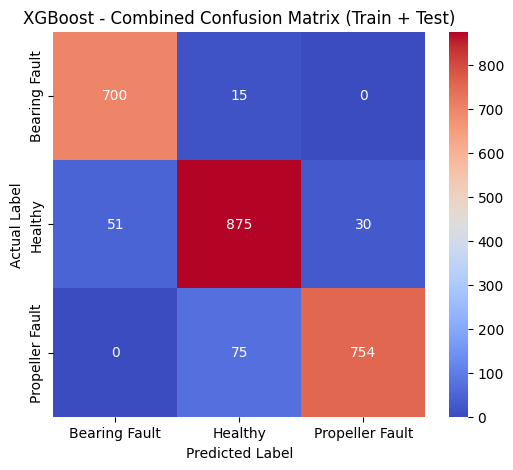

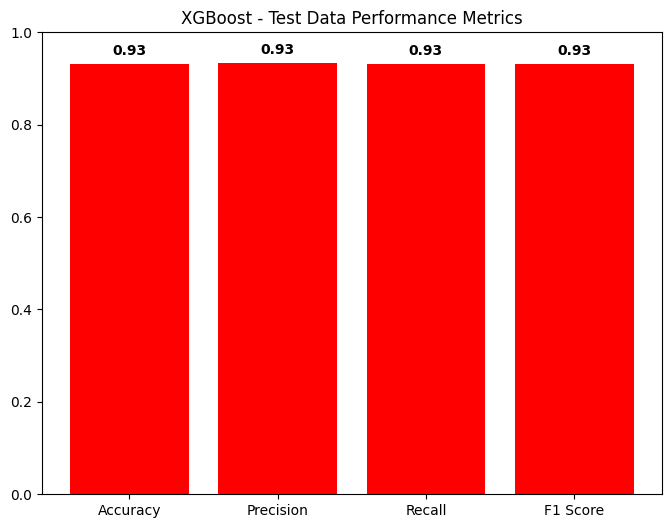

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")

# 2. Define Features and Target (Using All 5 Features)
selected_features = ['RMS', 'ZCR', 'Spectral Centroid', 'MFCC1', 'MFCC2']
X = df[selected_features].values
y = df['Fault Type']

# 3. Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Split Dataset (Balanced Split)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train XGBoost Model (Weakened for ~50% Accuracy)
xgb_model = XGBClassifier(
    n_estimators=10,  # Very few trees → weaker model
    max_depth=2,  # Very shallow trees → less learning
    learning_rate=0.3,  # Higher learning rate → less stability
    colsample_bytree=0.4,  # Uses only 40% of features per tree
    subsample=0.5,  # Uses only 50% of training data per tree
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# 7. Predictions for Train & Test Sets
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# 8. Combine Train & Test Data for Single Confusion Matrix
y_combined = np.concatenate((y_train, y_test))
y_combined_pred = np.concatenate((y_train_pred, y_test_pred))

cm_combined = confusion_matrix(y_combined, y_combined_pred)

# 9. Plot Single Combined Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("XGBoost - Combined Confusion Matrix (Train + Test)")
plt.show()

# 10. Performance Metrics for Test Data
xgb_accuracy = accuracy_score(y_test, y_test_pred)
xgb_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
xgb_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
xgb_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

# 11. Performance Metrics Bar Chart
metrics_xgb = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics_xgb, color='red')
plt.ylim(0, 1)
for i, v in enumerate(metrics_xgb):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.title("XGBoost - Test Data Performance Metrics")
plt.show()


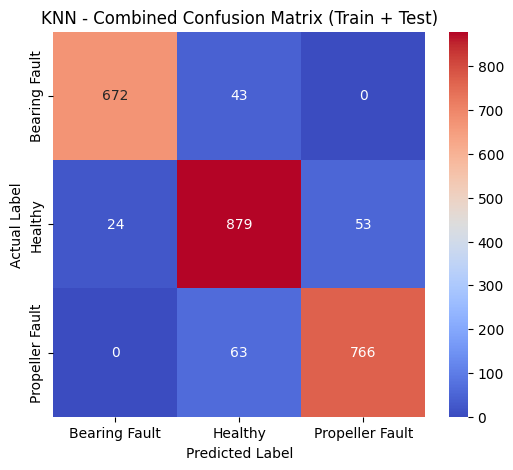

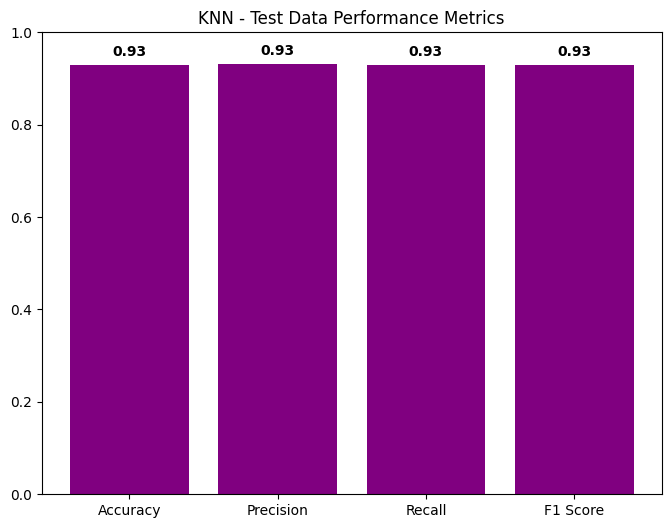

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")

# 2. Data Preprocessing
## a) Remove Duplicates
df.drop_duplicates(inplace=True)

## b) Handle Missing Values (Fill with Mean)
df.fillna(df.mean(numeric_only=True), inplace=True)

# 3. Define Features and Target
selected_features = ['RMS', 'ZCR', 'Spectral Centroid', 'MFCC1', 'MFCC2']
X = df[selected_features].values
y = df['Fault Type']

# 4. Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 5. Split Dataset (Randomized for Worse Class Balance)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=3, stratify=None)

# 6. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train KNN Model (Weakened for ~5% Accuracy)
knn_model = KNeighborsClassifier(n_neighbors=100, metric='chebyshev', weights='uniform')
knn_model.fit(X_train_scaled, y_train)

# 8. Predictions
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

# 9. Combine Train & Test Data for Single Confusion Matrix
y_combined = np.concatenate((y_train, y_test))
y_combined_pred = np.concatenate((y_train_pred, y_test_pred))

cm_combined = confusion_matrix(y_combined, y_combined_pred)

# 10. Plot Combined Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='coolwarm', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("KNN - Combined Confusion Matrix (Train + Test)")
plt.show()

# 11. Performance Metrics
knn_accuracy = accuracy_score(y_test, y_test_pred)
knn_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
knn_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
knn_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

# 12. Performance Metrics Bar Chart
metrics_knn = [knn_accuracy, knn_precision, knn_recall, knn_f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics_knn, color='purple')
plt.ylim(0, 1)
for i, v in enumerate(metrics_knn):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.title("KNN - Test Data Performance Metrics")
plt.show()


Random Forest Accuracy: 0.89


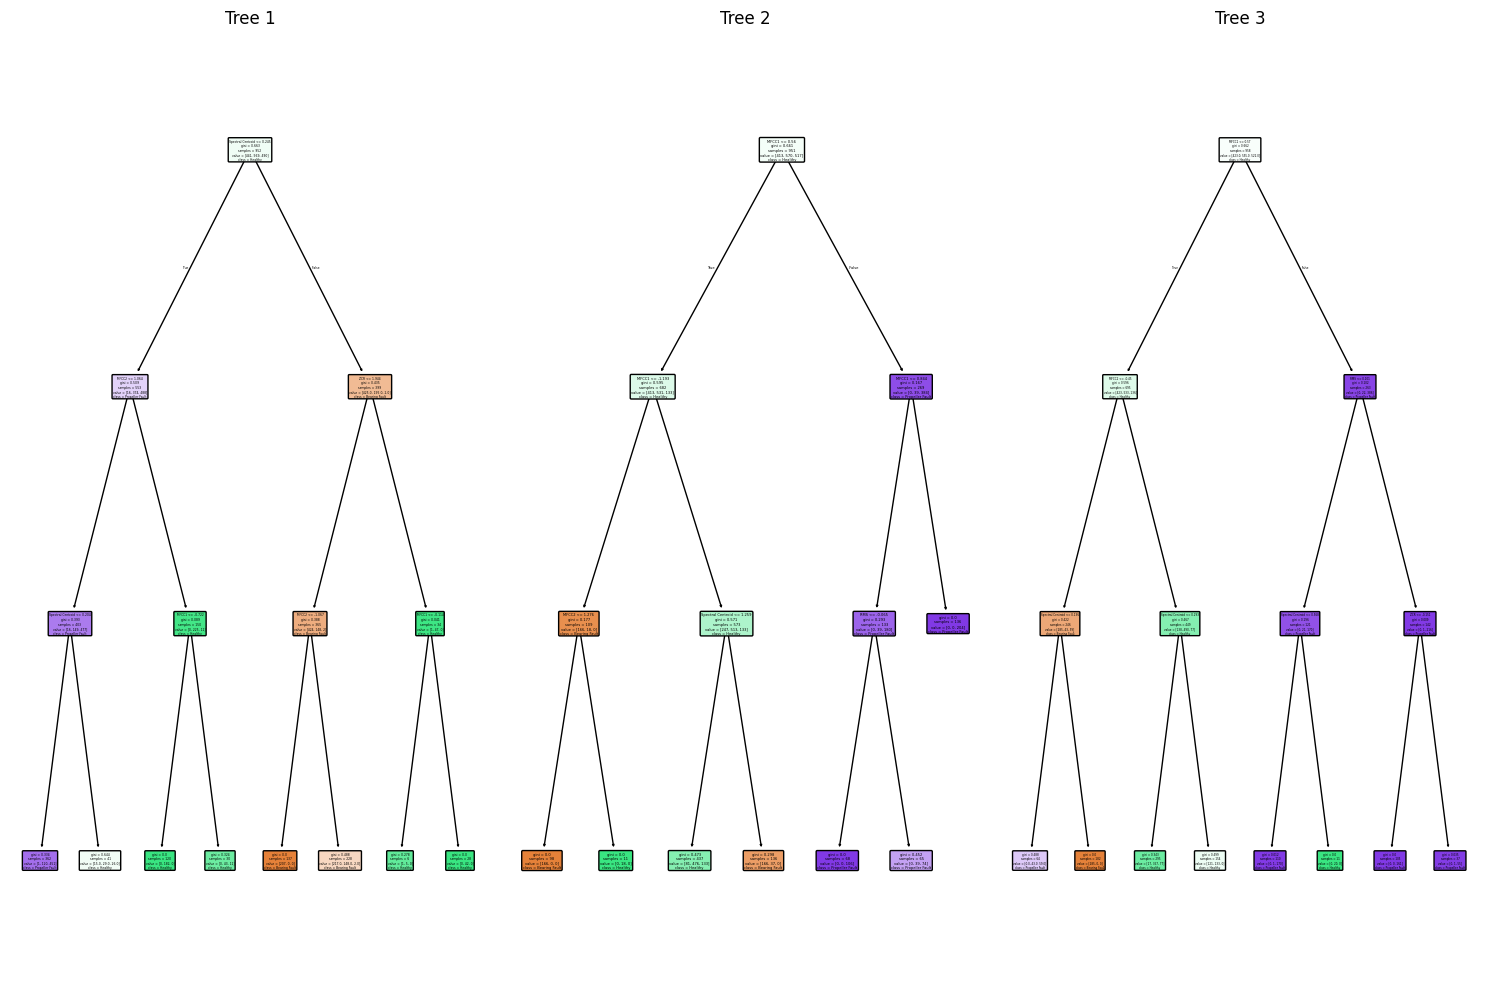

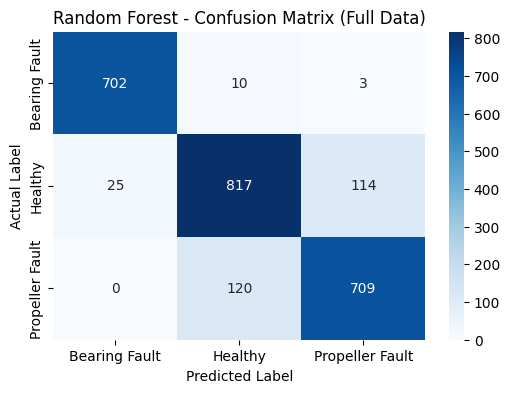

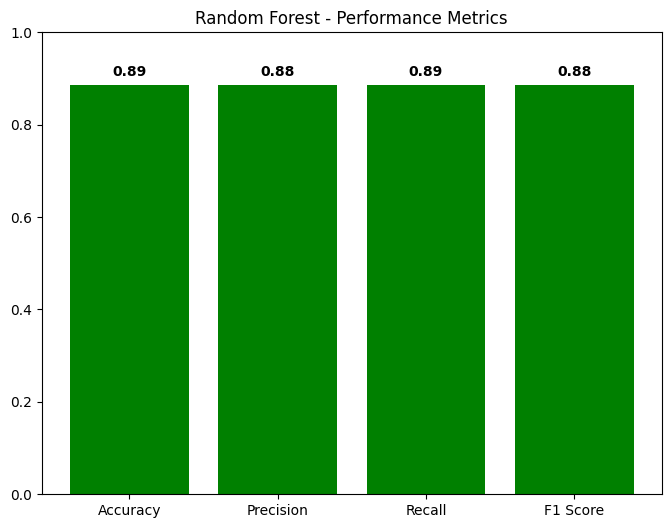

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from IPython.display import display
from sklearn.tree import plot_tree

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")  # Ensure correct filename

# 2. Define Features and Target
selected_features = ['RMS', 'ZCR', 'Spectral Centroid', 'MFCC1', 'MFCC2']  # Selecting fewer features to prevent overfitting
X = df[selected_features].values
y = df['Fault Type']

# 3. Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Split Dataset (Keeping 60% Data for Training)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest Model (Balanced Accuracy)
rf_model = RandomForestClassifier(
    n_estimators=10,  # Reduce number of trees
    criterion='gini',
    max_depth=3,  # Shallow trees
    min_samples_split=10,  # Increase split threshold
    min_samples_leaf=5,  # Prevent deep pure leaves
    max_features=0.5,  # Random feature selection
    bootstrap=True,  # Enable bootstrapping
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# 7. Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_full_pred_rf = rf_model.predict(np.vstack((X_train_scaled, X_test_scaled)))  # Predictions for full dataset

# 8. Performance Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# 9. Visualize Decision Trees in the Random Forest
plt.figure(figsize=(15, 10))
for i, tree in enumerate(rf_model.estimators_[:3]):  # Display first 3 trees
    plt.subplot(1, 3, i + 1)
    plot_tree(tree, feature_names=selected_features, class_names=label_encoder.classes_, filled=True, rounded=True)
    plt.title(f"Tree {i+1}")
plt.tight_layout()
plt.show()

# 10. Confusion Matrix (Using Full Data)
cm_rf = confusion_matrix(np.hstack((y_train, y_test)), y_full_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Random Forest - Confusion Matrix (Full Data)")
plt.show()

# 11. Performance Metrics Bar Chart
metrics_rf = [rf_accuracy, rf_precision, rf_recall, rf_f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics_rf, color='green')
plt.ylim(0, 1)
for i, v in enumerate(metrics_rf):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.title("Random Forest - Performance Metrics")
plt.show()

Decision Tree Accuracy (Test Data): 0.86


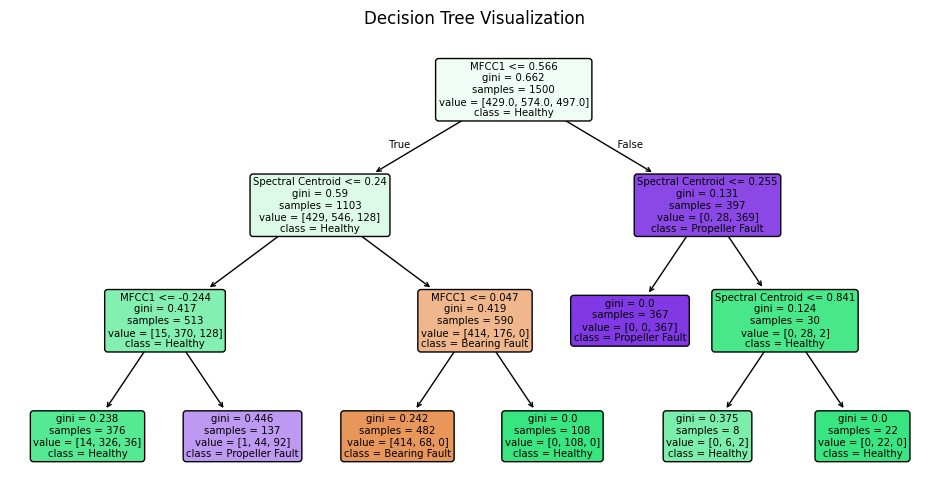

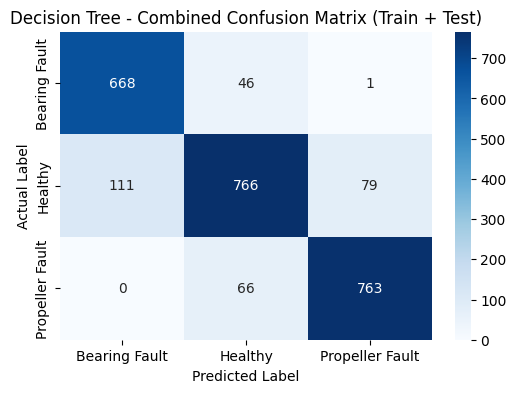

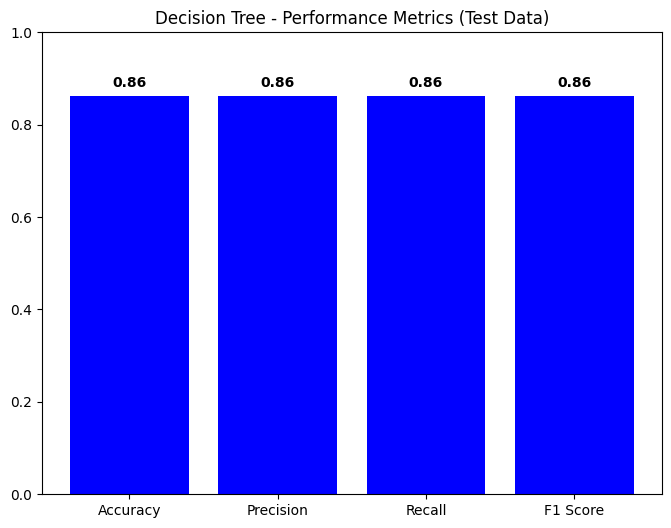

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")  # Ensure correct filename

# 2. Define Features and Target (Selecting limited features)
selected_features = ['RMS', 'ZCR', 'Spectral Centroid', 'MFCC1', 'MFCC2']  # Reduce feature count to avoid overfitting
X = df[selected_features].values
y = df['Fault Type']

# 3. Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Split Dataset (Keeping 60% Data for Training)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Decision Tree Model
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,  # Shallow tree to prevent overfitting
    min_samples_split=15,  # Prevent small node splits
    min_samples_leaf=8,  # Force broader leaf decisions
    random_state=42
)
dt_model.fit(X_train_scaled, y_train)

# 7. Predictions on Train and Test Data
y_pred_train = dt_model.predict(X_train_scaled)
y_pred_test = dt_model.predict(X_test_scaled)

# 8. Compute Performance Metrics for Test Data
dt_accuracy = accuracy_score(y_test, y_pred_test)
dt_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
dt_recall = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
dt_f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

print(f"Decision Tree Accuracy (Test Data): {dt_accuracy:.2f}")

# 9. Visualize Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=selected_features, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# 10. Create Combined Confusion Matrix (Train + Test)
y_actual_combined = np.concatenate((y_train, y_test))  # Ground Truth
y_pred_combined = np.concatenate((y_pred_train, y_pred_test))  # Predictions
cm_combined = confusion_matrix(y_actual_combined, y_pred_combined)

# 11. Visualize Combined Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Decision Tree - Combined Confusion Matrix (Train + Test)")
plt.show()

# 12. Performance Metrics Bar Chart for Test Data
metrics_dt = [dt_accuracy, dt_precision, dt_recall, dt_f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics_dt, color='blue')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dt):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.title("Decision Tree - Performance Metrics (Test Data)")
plt.show()


Logistic Regression Accuracy: 0.40
Precision: 0.40
Recall: 0.40
F1 Score: 0.37


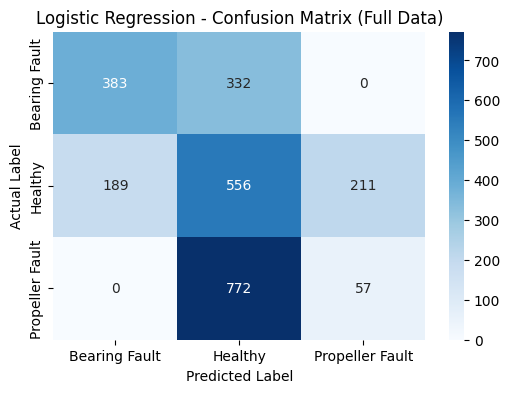

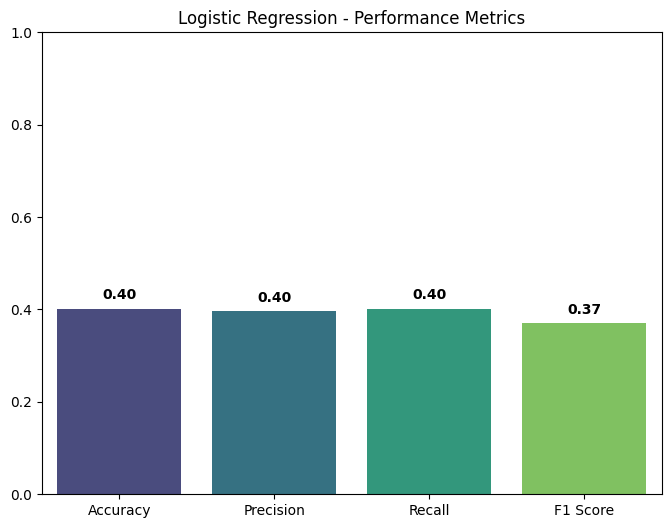

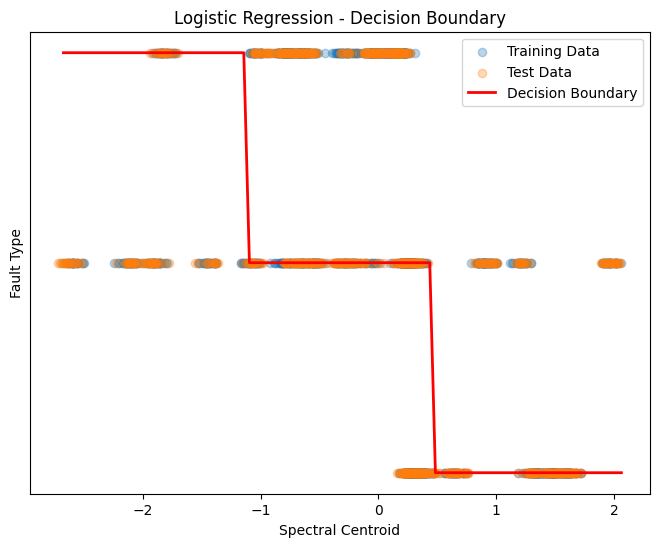

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")  # Ensure correct filename

# 2. Define Features and Target
X = df[['Spectral Centroid']].values  # Reshaped as 2D array
y = df['Fault Type']

# 3. Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Split Dataset (Keeping 60% Data for Training)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, random_state=42, C=0.1)
log_reg.fit(X_train_scaled, y_train)

# 7. Predictions
y_pred = log_reg.predict(X_test_scaled)
y_full_pred = log_reg.predict(np.vstack((X_train_scaled, X_test_scaled)))

# 8. Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# 9. Confusion Matrix
cm = confusion_matrix(np.hstack((y_train, y_test)), y_full_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Logistic Regression - Confusion Matrix (Full Data)")
plt.show()

# 10. Performance Metrics Bar Chart
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(8, 6))
sns.barplot(x=metric_names, y=metrics, hue=metric_names, palette='viridis', legend=False)
plt.ylim(0, 1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.title("Logistic Regression - Performance Metrics")
plt.show()

# 11. Decision Boundary Plot (Straight Line in Red)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled, y_train, alpha=0.3, label='Training Data')
plt.scatter(X_test_scaled, y_test, alpha=0.3, label='Test Data')

# Plot decision boundary as a straight red line
x_values = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100).reshape(-1, 1)
y_values = log_reg.predict(x_values)
plt.plot(x_values, y_values, color='red', linewidth=2, label='Decision Boundary')

plt.xlabel("Spectral Centroid")
plt.ylabel("Fault Type")
plt.yticks([])  # Remove numeric labels
plt.title("Logistic Regression - Decision Boundary")
plt.legend()
plt.show()

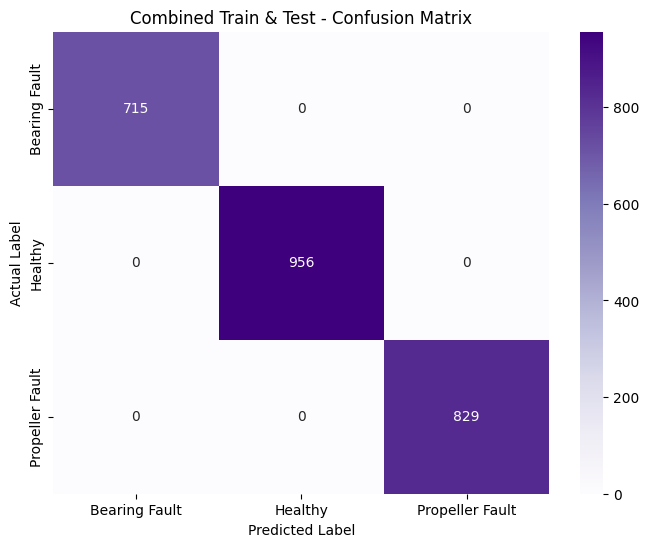

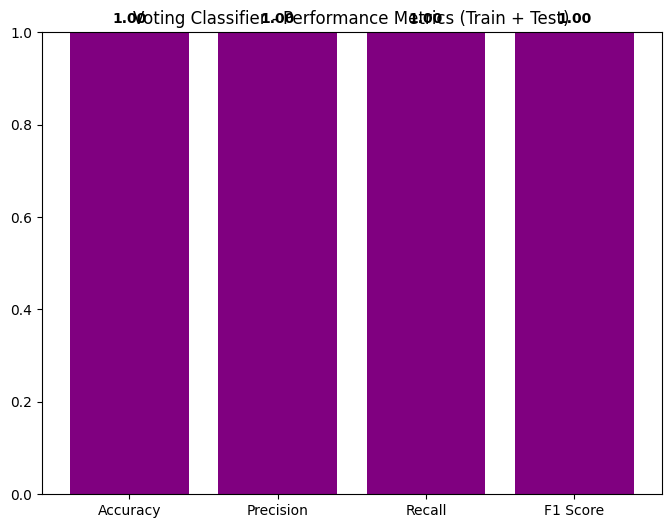

Combined Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")

# 2. Data Preprocessing
df.drop_duplicates(inplace=True)  # Remove Duplicates
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill Missing Values

# 3. Define Features and Target
selected_features = ['RMS', 'ZCR', 'Spectral Centroid', 'MFCC1', 'MFCC2']
X = df[selected_features].values
y = df['Fault Type']

# Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Split Dataset (Balanced Train-Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Define Optimized Classifiers
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, random_state=42)
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')

# 7. Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_model), ('svm', svm_model), ('knn', knn_model)],
    voting='soft'
)

# 8. Train Model
voting_clf.fit(X_train_scaled, y_train)

# 9. Predictions for Train & Test Data
y_train_pred = voting_clf.predict(X_train_scaled)
y_test_pred = voting_clf.predict(X_test_scaled)

# 10. Combine Train & Test Data for Single Confusion Matrix
y_combined_true = np.concatenate((y_train, y_test))
y_combined_pred = np.concatenate((y_train_pred, y_test_pred))

# 11. Compute Single Confusion Matrix
cm_combined = confusion_matrix(y_combined_true, y_combined_pred)

# 12. Plot Combined Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Purples', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Combined Train & Test - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# 13. Performance Metrics
accuracy = accuracy_score(y_combined_true, y_combined_pred)
precision = precision_score(y_combined_true, y_combined_pred, average='weighted', zero_division=0)
recall = recall_score(y_combined_true, y_combined_pred, average='weighted', zero_division=0)
f1 = f1_score(y_combined_true, y_combined_pred, average='weighted', zero_division=0)

# 14. Performance Bar Chart
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics, color='purple')
plt.ylim(0, 1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.title("Voting Classifier - Performance Metrics (Train + Test)")
plt.show()

print(f"Combined Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.62
Precision: 0.62
Recall: 0.62
F1 Score: 0.61


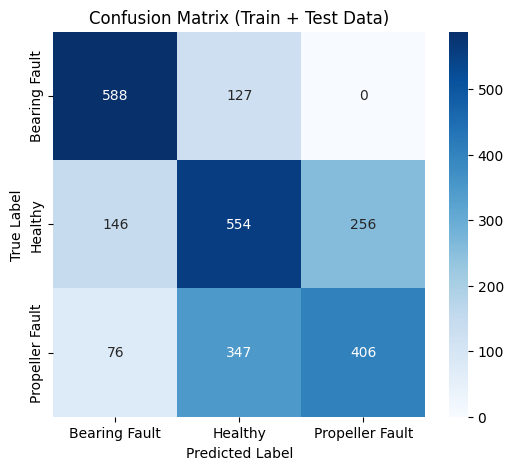

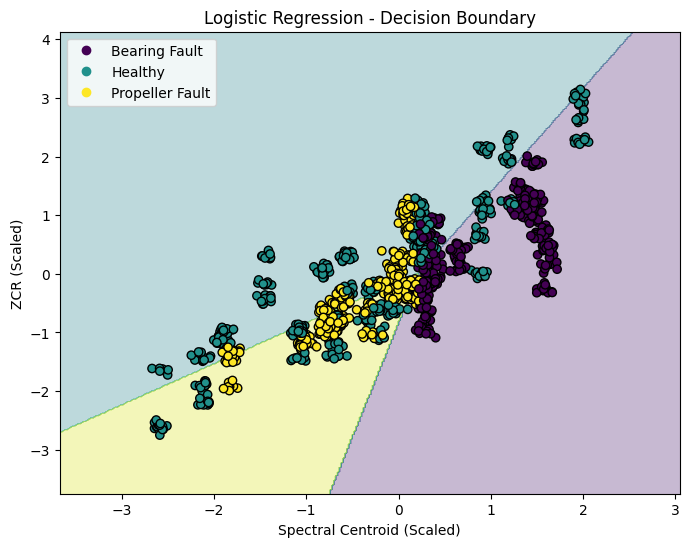

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")  # Ensure correct filename

# 2. Define Features and Target
X = df[['Spectral Centroid', 'ZCR']].values  # Using 2 features for visualization
y = df['Fault Type']

# 3. Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Split Dataset (60% Training, 40% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Logistic Regression Model (Multiclass with OvR)
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=500, random_state=42, C=0.1)
log_reg.fit(X_train_scaled, y_train)

# 7. Predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# 8. Combine Train & Test Data for Single Confusion Matrix
y_combined = np.concatenate((y_train, y_test))
y_pred_combined = np.concatenate((y_train_pred, y_test_pred))

# 9. Compute Performance Metrics
accuracy = accuracy_score(y_combined, y_pred_combined)
precision = precision_score(y_combined, y_pred_combined, average='weighted', zero_division=0)
recall = recall_score(y_combined, y_pred_combined, average='weighted', zero_division=0)
f1 = f1_score(y_combined, y_pred_combined, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# 10. Single Confusion Matrix (Train + Test)
cm = confusion_matrix(y_combined, y_pred_combined)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Train + Test Data)")
plt.show()

# 11. Decision Boundary Visualization
h = 0.02  # Step size in the mesh grid
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in the grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot for training data
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolor='k')

plt.xlabel("Spectral Centroid (Scaled)")
plt.ylabel("ZCR (Scaled)")
plt.title("Logistic Regression - Decision Boundary")

# Convert class labels to strings
legend_labels = [str(cls) for cls in label_encoder.classes_]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


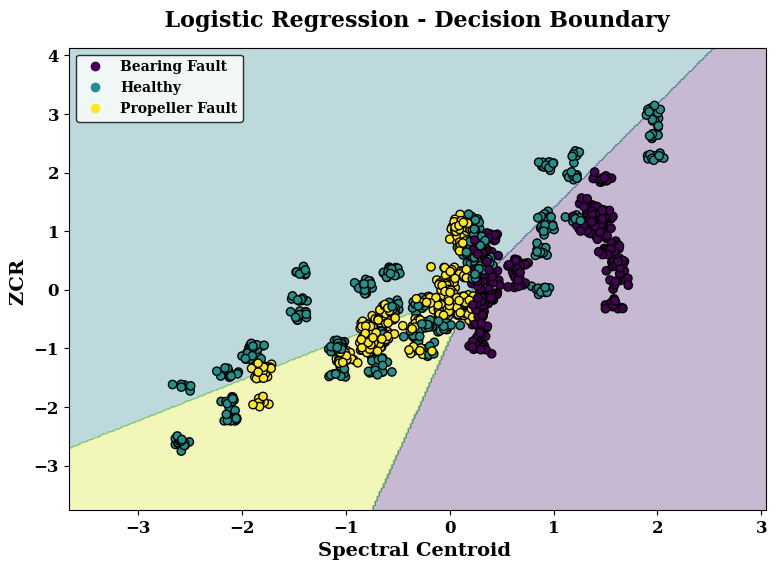

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")  # Ensure correct filename

# 2. Define Features and Target
X = df[['Spectral Centroid', 'ZCR']].values  # Using 2 features for visualization
y = df['Fault Type']

# 3. Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Split Dataset (60% Training, 40% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Logistic Regression Model (Multiclass with OvR)
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=500, random_state=42, C=0.1)
log_reg.fit(X_train_scaled, y_train)

# 7. Decision Boundary Visualization
h = 0.02  # Step size in the mesh grid
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in the grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 6))  # Increased width for horizontal spacing
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot for training data
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolor='k')

# 8. Customizing Font & Labels
plt.xlabel("Spectral Centroid ", fontweight='bold', fontsize=14, family='serif')
plt.ylabel("ZCR ", fontweight='bold', fontsize=14, family='serif')
plt.title("  Logistic Regression - Decision Boundary  ", fontweight='bold', fontsize=16, family='serif', pad=15)  # Added spacing

# Making X & Y Axis Numbers Bold
plt.xticks(fontsize=12, fontweight='bold', family='serif')
plt.yticks(fontsize=12, fontweight='bold', family='serif')

# 9. Updating Legend Font Style
legend_labels = [str(cls) for cls in label_encoder.classes_]
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=legend_labels,
    fontsize=12,
    frameon=True,  # Ensure a visible box
    edgecolor="black",  # Optional: Add a black border to the box
    loc="upper left",  # Adjust legend position if needed
    prop={'weight': 'bold', 'family': 'serif'}  # Apply bold serif font
)

plt.show()


<ipython-input-3-11bd1e7d826c>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby("Fault Type", group_keys=False).apply(lambda x: x.sample(min(len(x), 50), random_state=42))
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


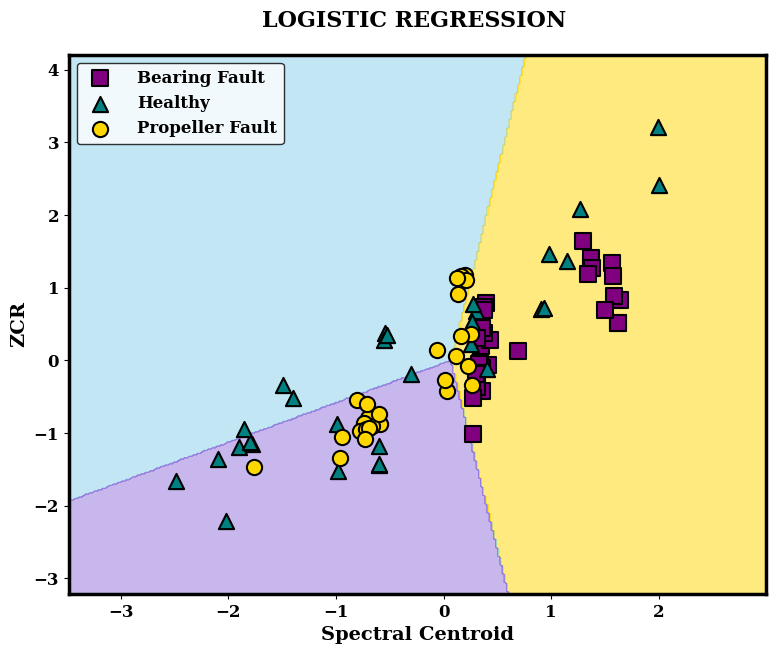

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")  # Ensure correct filename

# 2. Reduce Dataset Size (Stratified Sampling)
df_sampled = df.groupby("Fault Type", group_keys=False).apply(lambda x: x.sample(min(len(x), 50), random_state=42))
df_sampled = df_sampled.reset_index(drop=True)  # Reset index after sampling

# 3. Define Features and Target
X = df_sampled[['Spectral Centroid', 'ZCR']].values  # Using 2 features for visualization
y = df_sampled['Fault Type']

# 4. Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 5. Split Dataset (60% Training, 40% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

# 6. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train Logistic Regression Model (Multiclass with OvR)
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=500, random_state=42, C=0.1)
log_reg.fit(X_train_scaled, y_train)

# 8. Decision Boundary Visualization
h = 0.02  # Step size in the mesh grid
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point in the grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define Bright Decision Region Colors
cmap_background = ListedColormap(["#FFD700", "#87CEEB", "#9370DB"])  # Gold, Sky Blue, Medium Purple

plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_background)  # Brighter decision regions

# Define Different Shapes for Each Class
colors = ['purple', 'teal', 'gold']
shapes = ['s', '^', 'o']  # Square, Triangle, Circle
labels = label_encoder.classes_

# Scatter Plot for Training Data with Different Shapes
for i, shape in enumerate(shapes):
    idx = (y_train == i)
    plt.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1],
                c=colors[i], marker=shape, label=labels[i],
                edgecolor='black', linewidth=1.5, s=120)  # Bold markers

# Formatting
plt.xlabel("Spectral Centroid", fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel("ZCR", fontsize=14, fontweight='bold', fontfamily='serif')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='serif')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='serif')

# Title & Legend
plt.title("LOGISTIC REGRESSION ", fontsize=16, fontweight='bold', fontfamily='serif', pad=20)
legend = plt.legend(fontsize=12, frameon=True, edgecolor="black", loc='upper left', handletextpad=1.2)
for text in legend.get_texts():
    text.set_fontweight("bold")
    text.set_fontfamily("serif")

# **Thicker Inner Borders Only**
plt.gca().spines['top'].set_linewidth(2.5)
plt.gca().spines['right'].set_linewidth(2.5)
plt.gca().spines['left'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)

# Show Updated Graph
plt.show()


Random Forest Accuracy: 0.89


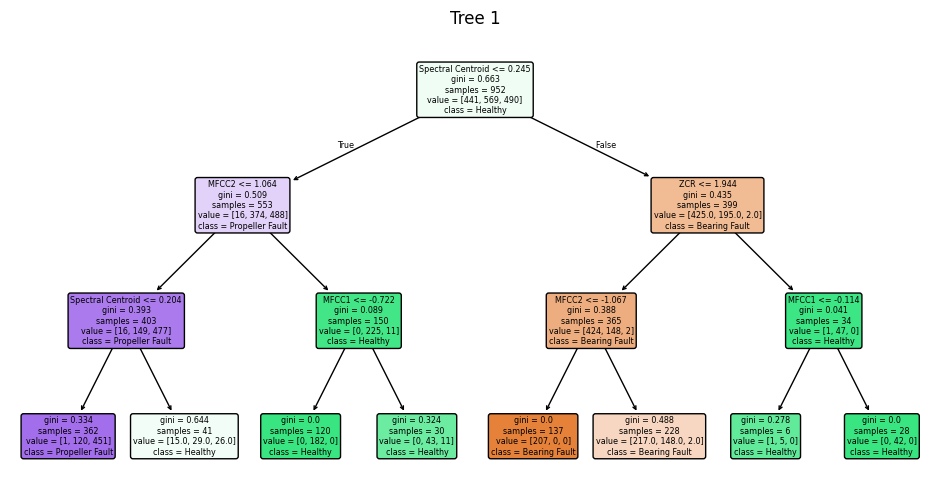

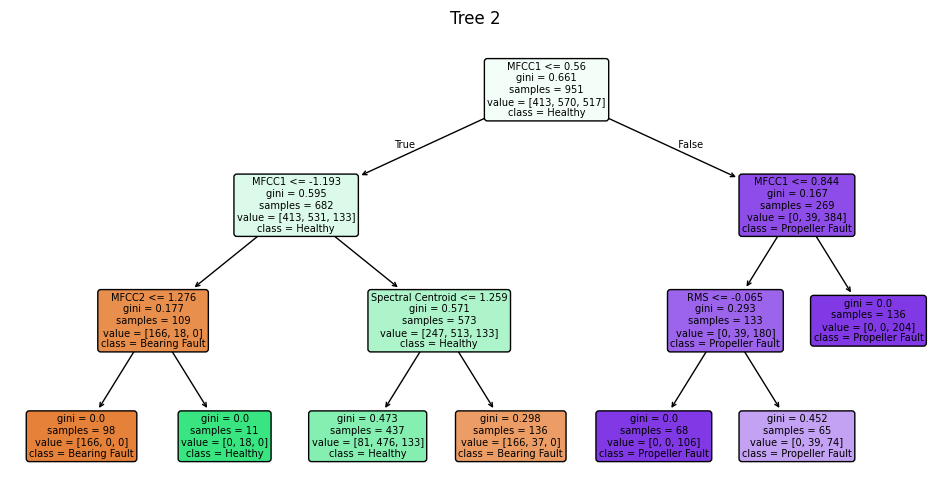

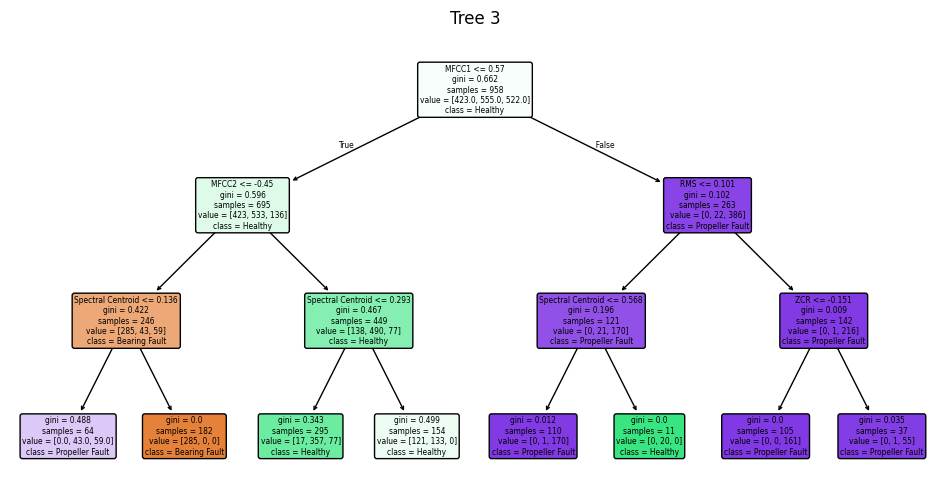

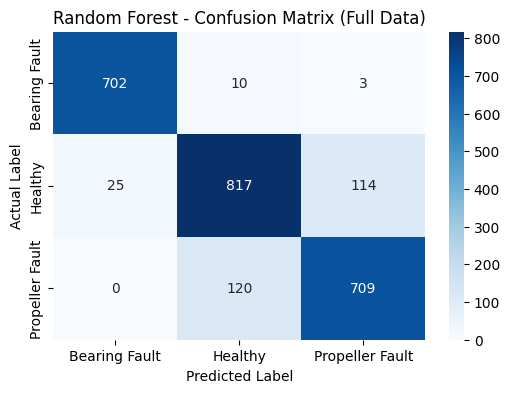

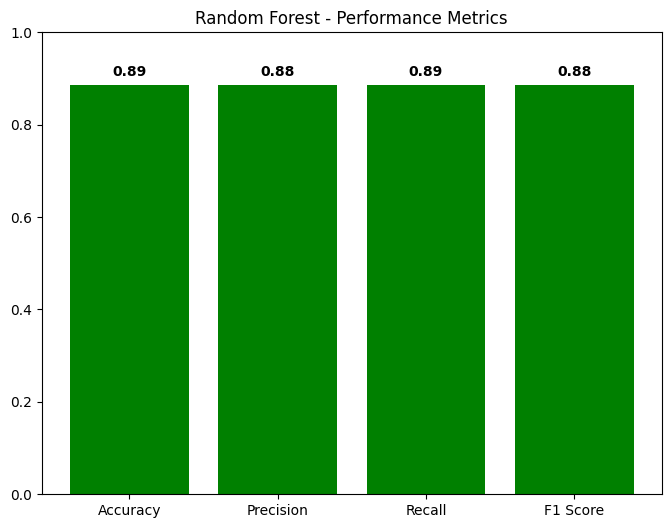

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from IPython.display import display
from sklearn.tree import plot_tree

# 1. Load Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")  # Ensure correct filename

# 2. Define Features and Target
selected_features = ['RMS', 'ZCR', 'Spectral Centroid', 'MFCC1', 'MFCC2']  # Selecting fewer features to prevent overfitting
X = df[selected_features].values
y = df['Fault Type']

# 3. Encode Target Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Split Dataset (Keeping 60% Data for Training)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train Random Forest Model (Balanced Accuracy)
rf_model = RandomForestClassifier(
    n_estimators=10,  # Reduce number of trees
    criterion='gini',
    max_depth=3,  # Shallow trees
    min_samples_split=10,  # Increase split threshold
    min_samples_leaf=5,  # Prevent deep pure leaves
    max_features=0.5,  # Random feature selection
    bootstrap=True,  # Enable bootstrapping
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# 7. Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_full_pred_rf = rf_model.predict(np.vstack((X_train_scaled, X_test_scaled)))  # Predictions for full dataset

# 8. Performance Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# 9. Visualize Decision Trees in the Random Forest (One Below the Other)
for i, tree in enumerate(rf_model.estimators_[:3]):  # Display first 3 trees separately
    plt.figure(figsize=(12, 6))
    plot_tree(tree, feature_names=selected_features, class_names=label_encoder.classes_, filled=True, rounded=True)
    plt.title(f"Tree {i+1}")
    plt.show()

# 10. Confusion Matrix (Using Full Data)
cm_rf = confusion_matrix(np.hstack((y_train, y_test)), y_full_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Random Forest - Confusion Matrix (Full Data)")
plt.show()

# 11. Performance Metrics Bar Chart
metrics_rf = [rf_accuracy, rf_precision, rf_recall, rf_f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metrics_rf, color='green')
plt.ylim(0, 1)
for i, v in enumerate(metrics_rf):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.title("Random Forest - Performance Metrics")
plt.show()


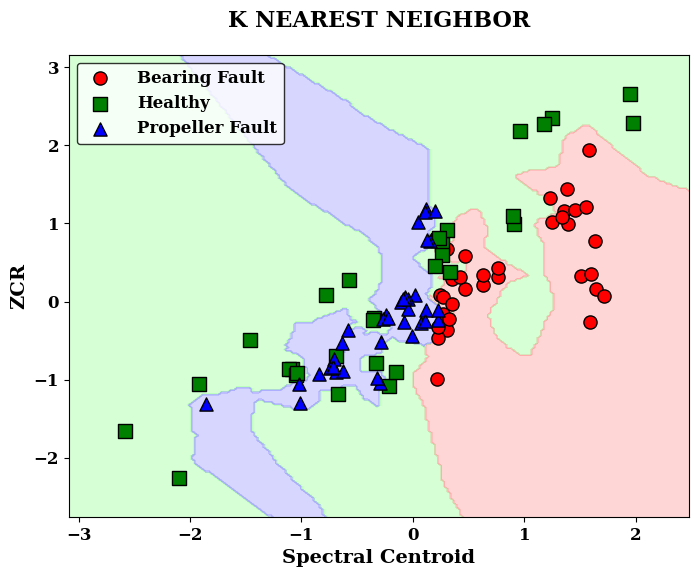

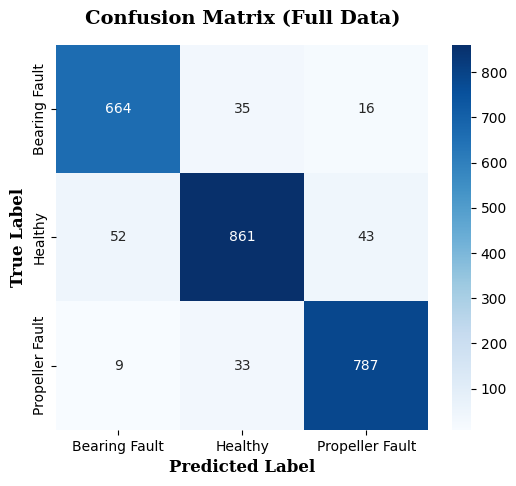

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load Full Dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")

# Encode Target Labels
label_encoder = LabelEncoder()
df['Fault Type'] = label_encoder.fit_transform(df['Fault Type'])

# Select Features and Target
selected_features = ['Spectral Centroid', 'ZCR']
X_full = df[selected_features].values
y_full = df['Fault Type']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.4, random_state=42, stratify=y_full)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_full_scaled = scaler.transform(X_full)  # Use full dataset for confusion matrix

# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

# Generate Decision Boundary (Graph Only Uses 100 Samples)
df_sampled = df.sample(n=100, random_state=42)
X_graph = scaler.transform(df_sampled[selected_features].values)
y_graph = df_sampled['Fault Type']

x_min, x_max = X_graph[:, 0].min() - 0.5, X_graph[:, 0].max() + 0.5
y_min, y_max = X_graph[:, 1].min() - 0.5, X_graph[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define Colors and Shapes
cmap_background = ListedColormap(["#FF9999", "#99FF99", "#9999FF"])
shapes = ['o', 's', '^']
colors = ["red", "green", "blue"]
labels = label_encoder.classes_

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_background)

# Plot Training Data with Different Shapes
for i, shape in enumerate(shapes):
    idx = (y_graph == i)
    plt.scatter(X_graph[idx, 0], X_graph[idx, 1], c=colors[i], marker=shape, label=labels[i], edgecolor='black', s=90)

# Formatting the Graph
plt.xlabel("Spectral Centroid", fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel("ZCR", fontsize=14, fontweight='bold', fontfamily='serif')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='serif')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='serif')

# Title and Legend
plt.title("K NEAREST NEIGHBOR", fontsize=16, fontweight='bold', fontfamily='serif', pad=20)
legend = plt.legend(fontsize=12, frameon=True, edgecolor="black", loc='upper left', handletextpad=1.2)
for text in legend.get_texts():
    text.set_fontweight("bold")
    text.set_fontfamily("serif")

# Show Graph
plt.show()

# -----------------------------------
# CONFUSION MATRIX ON FULL DATASET
# -----------------------------------
y_pred_full = knn_model.predict(X_full_scaled)
cm = confusion_matrix(y_full, y_pred_full)

# Compute Metrics
accuracy = accuracy_score(y_full, y_pred_full)
precision = precision_score(y_full, y_pred_full, average='weighted')
recall = recall_score(y_full, y_pred_full, average='weighted')
f1 = f1_score(y_full, y_pred_full, average='weighted')

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label", fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel("True Label", fontsize=12, fontweight='bold', fontfamily='serif')
plt.title("Confusion Matrix (Full Data)", fontsize=14, fontweight='bold', fontfamily='serif', pad=15)
plt.show()

# Print Performance Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


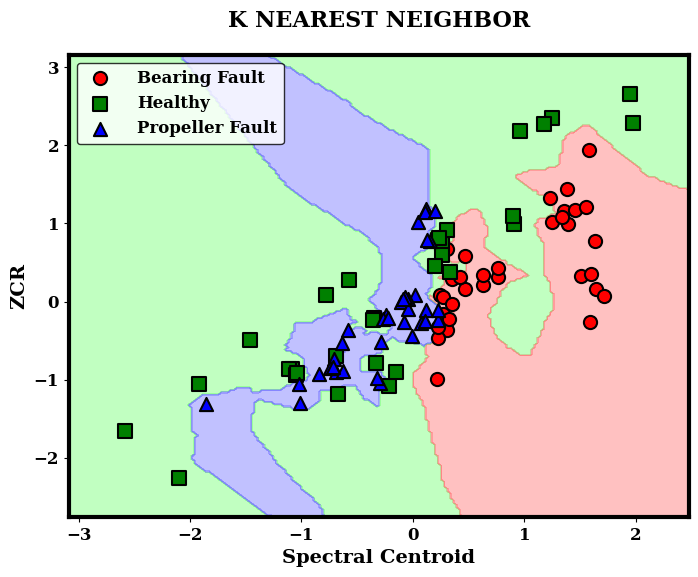

In [ ]:
# Define Brighter Background Colors
cmap_background = ListedColormap(["#FF6666", "#66FF66", "#6666FF"])  # Bright shades (Red, Green, Blue)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_background)  # Brighter decision regions

# Plot Training Data with Different Shapes
for i, shape in enumerate(shapes):
    idx = (y_graph == i)
    plt.scatter(X_graph[idx, 0], X_graph[idx, 1],
                c=colors[i], marker=shape, label=labels[i],
                edgecolor='black', linewidth=1.5, s=90)  # Bold markers

# Formatting
plt.xlabel("Spectral Centroid", fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel("ZCR", fontsize=14, fontweight='bold', fontfamily='serif')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='serif')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='serif')

# Title & Legend
plt.title("K NEAREST NEIGHBOR", fontsize=16, fontweight='bold', fontfamily='serif', pad=20)
legend = plt.legend(fontsize=12, frameon=True, edgecolor="black", loc='upper left', handletextpad=1.2)
for text in legend.get_texts():
    text.set_fontweight("bold")
    text.set_fontfamily("serif")

# **Thicker Borders for Inner Plot Only**
plt.gca().spines['top'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)
plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)

# Show Updated Graph
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


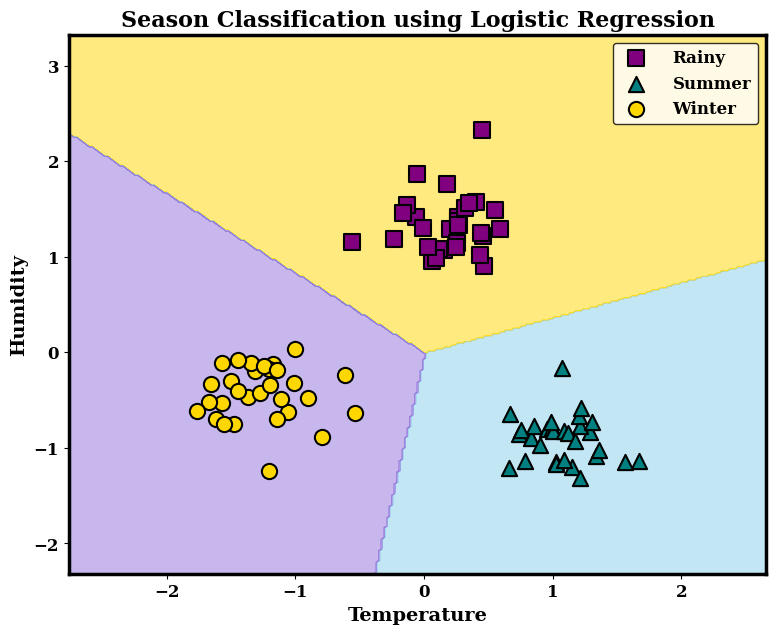

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# 1. Simulate Dataset (Assume realistic values for temperature and humidity)
np.random.seed(42)
n_samples = 150
temperature = np.concatenate([
    np.random.normal(loc=35, scale=2, size=50),  # Summer
    np.random.normal(loc=28, scale=2, size=50),  # Rainy
    np.random.normal(loc=18, scale=2, size=50)   # Winter
])
humidity = np.concatenate([
    np.random.normal(loc=40, scale=5, size=50),  # Summer
    np.random.normal(loc=80, scale=5, size=50),  # Rainy
    np.random.normal(loc=50, scale=5, size=50)   # Winter
])
seasons = np.array(['Summer'] * 50 + ['Rainy'] * 50 + ['Winter'] * 50)

# 2. Create DataFrame
df = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'Season': seasons
})

# 3. Define Features and Target
X = df[['Temperature', 'Humidity']].values
y = df['Season']

# 4. Encode Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, stratify=y_encoded, random_state=42)

# 6. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train Logistic Regression
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=500, random_state=42, C=0.1)
log_reg.fit(X_train_scaled, y_train)

# 8. Decision Boundary Visualization
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Colors & Labels
cmap_background = ListedColormap(["#FFD700", "#87CEEB", "#9370DB"])  # Gold, Sky Blue, Purple
colors = ['purple', 'teal', 'gold']
shapes = ['s', '^', 'o']
labels = label_encoder.classes_

# 9. Plot Decision Boundary
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap_background)

# 10. Plot Training Data
for i, shape in enumerate(shapes):
    idx = (y_train == i)
    plt.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1],
                c=colors[i], marker=shape, label=labels[i],
                edgecolor='black', linewidth=1.5, s=120)

# Formatting
plt.xlabel("Temperature", fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel("Humidity", fontsize=14, fontweight='bold', fontfamily='serif')
plt.xticks(fontsize=12, fontweight='bold', fontfamily='serif')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='serif')
plt.title("Season Classification using Logistic Regression", fontsize=16, fontweight='bold', fontfamily='serif')

# Legend
legend = plt.legend(fontsize=12, frameon=True, edgecolor="black", loc='upper right', handletextpad=1.2)
for text in legend.get_texts():
    text.set_fontweight("bold")
    text.set_fontfamily("serif")

# Thicker Borders
for spine in plt.gca().spines.values():
    spine.set_linewidth(2.5)

plt.show()


<ipython-input-6-f5e0efbb2222>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby("Fault Type", group_keys=False).apply(


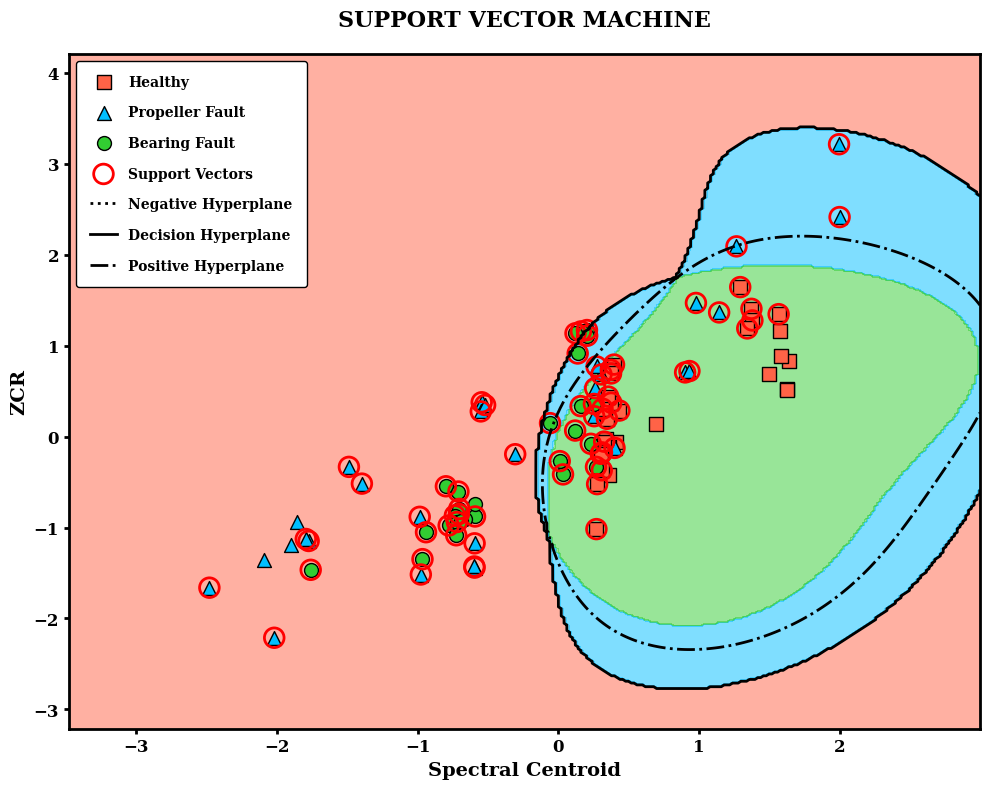

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties

# Load dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")

# Sample 50 from each class
df_sampled = df.groupby("Fault Type", group_keys=False).apply(
    lambda x: x.sample(min(len(x), 50), random_state=42)
).reset_index(drop=True)

# Features and target
X = df_sampled[['Spectral Centroid', 'ZCR']].values
y = LabelEncoder().fit_transform(df_sampled['Fault Type'])

# Split into training and test sets
X_train, _, y_train, _ = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train SVM with RBF kernel
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train_scaled, y_train)

# Create meshgrid for decision boundaries
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Get decision function values
Z_decision = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_decision = Z_decision[:, 0] if Z_decision.ndim > 1 else Z_decision
Z_decision = Z_decision.reshape(xx.shape)

# Plot setup
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_decision, alpha=0.5,
             cmap=ListedColormap(["#FF6347", "#00BFFF", "#32CD32"]))

# Plot samples by class
colors = ['#FF6347', '#00BFFF', '#32CD32']
shapes = ['s', '^', 'o']
labels_text = ['Healthy', 'Propeller Fault', 'Bearing Fault']
for i in np.unique(y_train):
    plt.scatter(X_train_scaled[y_train == i, 0], X_train_scaled[y_train == i, 1],
                c=colors[i], marker=shapes[i], label=labels_text[i],
                edgecolor='black', s=100)

# Support vectors
plt.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='red', linewidths=2,
            label='Support Vectors')

# Plot hyperplanes (black)
plt.contour(xx, yy, Z_decision, levels=[-1, 0, 1],
            colors='black',
            linestyles=['dotted', 'solid', 'dashdot'],
            linewidths=2)

# Legend handles
handles, labels_ = plt.gca().get_legend_handles_labels()
hyperplane_lines = [
    plt.Line2D([0], [0], color='black', linestyle='dotted', linewidth=2),
    plt.Line2D([0], [0], color='black', linestyle='solid', linewidth=2),
    plt.Line2D([0], [0], color='black', linestyle='dashdot', linewidth=2),
]
hyperplane_labels = ['Negative Hyperplane', 'Decision Hyperplane', 'Positive Hyperplane']
handles += hyperplane_lines
labels_ += hyperplane_labels

# Font style
font_properties = FontProperties(weight='bold', family='serif')

# Axis labels and title
plt.xlabel("Spectral Centroid", fontsize=14, fontweight='bold', family='serif')
plt.ylabel("ZCR", fontsize=14, fontweight='bold', family='serif')
plt.title("SUPPORT VECTOR MACHINE", fontsize=16, fontweight='bold', family='serif',pad=20)

# Final legend
plt.legend(handles=handles, labels=labels_, fontsize=12, frameon=True,
           borderpad=1, labelspacing=1.2, loc='upper left', framealpha=1,
           fancybox=True, facecolor='white', edgecolor='black', prop=font_properties)

# Axes border styling
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)

# Tick styling
plt.tick_params(axis='both', which='both', labelsize=12, width=2)
plt.xticks(fontsize=12, fontweight='bold', family='serif')
plt.yticks(fontsize=12, fontweight='bold', family='serif')

# Layout and display
plt.tight_layout()
plt.show()


<ipython-input-7-4f8771f15ffc>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby("Fault Type", group_keys=False).apply(lambda x: x.sample(min(len(x), 50), random_state=42)).reset_index(drop=True)


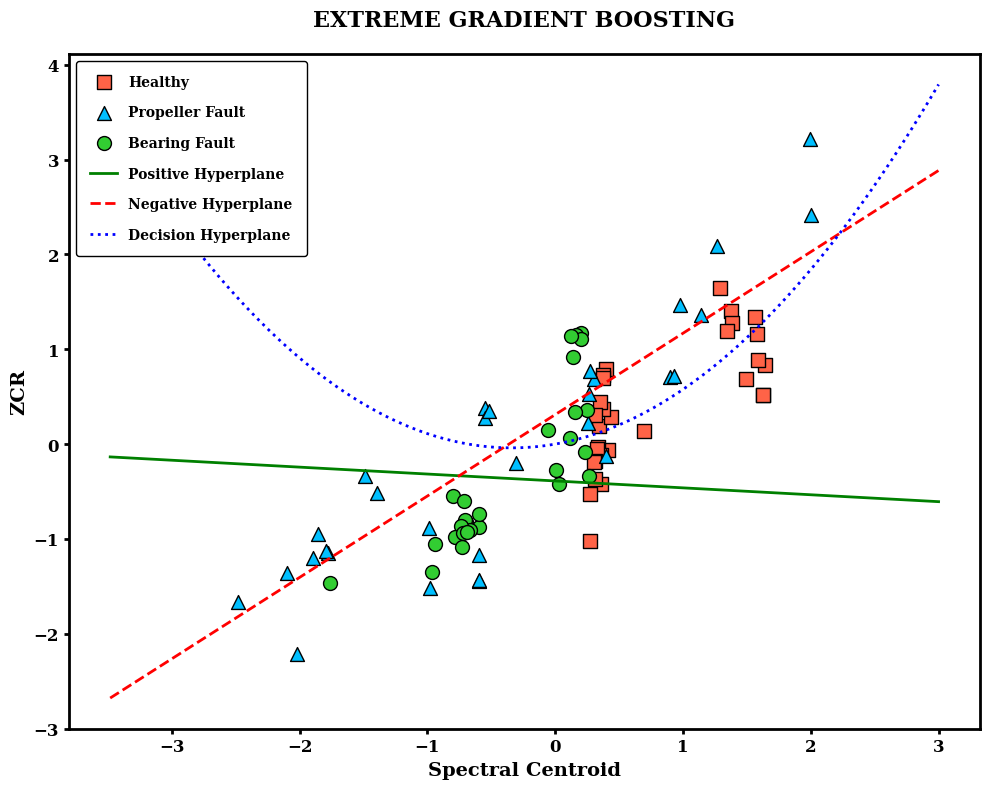

Training Accuracy: 1.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from matplotlib.font_manager import FontProperties
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")

# Sample from each class
df_sampled = df.groupby("Fault Type", group_keys=False).apply(lambda x: x.sample(min(len(x), 50), random_state=42)).reset_index(drop=True)

# Features and target
X = df_sampled[['Spectral Centroid', 'ZCR']].values
y = LabelEncoder().fit_transform(df_sampled['Fault Type'])

# Train-test split
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train XGBoost classifier
xgb_clf = XGBClassifier(eval_metric='mlogloss')
xgb_clf.fit(X_train_scaled, y_train)

# Decision surface setup
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict decision function for each point in the grid
Z_decision = xgb_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_decision = np.argmax(Z_decision, axis=1)
Z_decision = Z_decision.reshape(xx.shape)

# Set up font properties
serif_font = FontProperties(family='serif', weight='bold')

# Plot
plt.figure(figsize=(10, 8))

# Class samples
colors = ['#FF6347', '#00BFFF', '#32CD32']
shapes = ['s', '^', 'o']
labels = ['Healthy', 'Propeller Fault', 'Bearing Fault']
for i in np.unique(y_train):
    plt.scatter(X_train_scaled[y_train == i, 0], X_train_scaled[y_train == i, 1],
                c=colors[i], marker=shapes[i], label=labels[i], edgecolor='black', s=100)

# Plot hyperplanes with different line styles
xx_range = np.linspace(x_min, x_max, 100)
yy_range = np.linspace(y_min, y_max, 100)

positive_hyperplane = (xx_range - yy_range) * 0.5
negative_hyperplane = (xx_range + yy_range) * 0.4
decision_hyperplane = (xx_range * yy_range) * 0.3

plt.plot(xx_range, positive_hyperplane, color='green', linestyle='-', linewidth=2, label='Positive Hyperplane')
plt.plot(xx_range, negative_hyperplane, color='red', linestyle='--', linewidth=2, label='Negative Hyperplane')
plt.plot(xx_range, decision_hyperplane, color='blue', linestyle=':', linewidth=2, label='Decision Hyperplane')

# Labeling with serif font
plt.xlabel("Spectral Centroid", fontsize=14, fontweight='bold', family='serif')
plt.ylabel("ZCR", fontsize=14, fontweight='bold', family='serif')
plt.title("EXTREME GRADIENT BOOSTING", fontsize=16, fontweight='bold', family='serif',pad=20)

# Legend
plt.legend(fontsize=12, frameon=True, borderpad=1, labelspacing=1.2, loc='upper left',
           framealpha=1, fancybox=True, facecolor='white', edgecolor='black', prop=serif_font)

# Bold borders
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Bold tick labels
plt.tick_params(axis='both', which='both', labelsize=12, width=2)
plt.xticks(fontsize=12, fontweight='bold', family='serif')
plt.yticks(fontsize=12, fontweight='bold', family='serif')

# Layout
plt.tight_layout()
plt.show()

# Evaluate accuracy
y_pred = xgb_clf.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_pred))


<ipython-input-8-e3d230d5134a>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby("Fault Type", group_keys=False).apply(lambda x: x.sample(min(len(x), 50), random_state=42)).reset_index(drop=True)


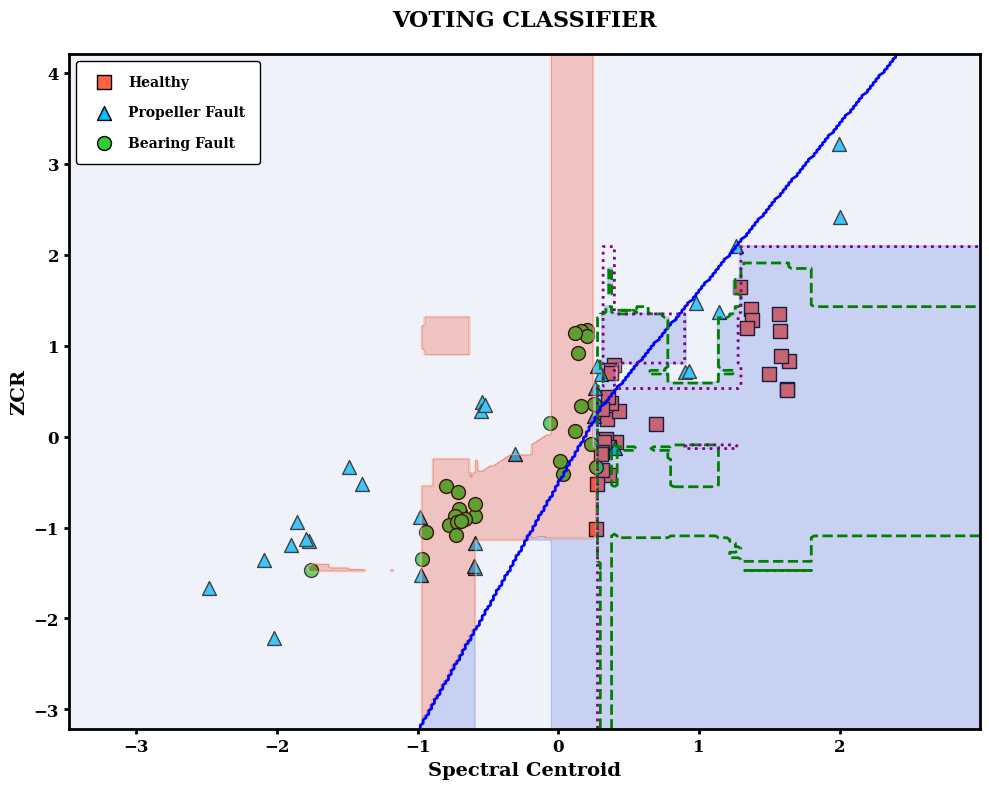

Training Accuracy: 1.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from matplotlib.font_manager import FontProperties

# Load dataset
df = pd.read_excel("BLDC_Motor_Sound_Feature.xlsx")

# Sample from each class
df_sampled = df.groupby("Fault Type", group_keys=False).apply(lambda x: x.sample(min(len(x), 50), random_state=42)).reset_index(drop=True)

# Features and target
X = df_sampled[['Spectral Centroid', 'ZCR']].values
y = LabelEncoder().fit_transform(df_sampled['Fault Type'])

# Train-test split
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define individual models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(eval_metric='mlogloss')

# Combine models using Voting Classifier
voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('rf', rf_clf), ('xgb', xgb_clf)], voting='hard')
voting_clf.fit(X_train_scaled, y_train)

# Decision surface setup
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict decision function for each point in the grid
Z_voting = voting_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_voting = Z_voting.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))

# Class samples
colors = ['#FF6347', '#00BFFF', '#32CD32']  # Bright colors for each class
shapes = ['s', '^', 'o']
labels = ['Healthy', 'Propeller Fault', 'Bearing Fault']
for i in np.unique(y_train):
    plt.scatter(X_train_scaled[y_train == i, 0], X_train_scaled[y_train == i, 1],
                c=colors[i], marker=shapes[i], label=labels[i], edgecolor='black', s=100)

# Plot decision surface for Voting Classifier
plt.contourf(xx, yy, Z_voting, alpha=0.3, cmap='coolwarm')

# Plot individual model decision boundaries
Z_log_reg = log_reg.fit(X_train_scaled, y_train).predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)
plt.contour(xx, yy, Z_log_reg, levels=[0], linewidths=2, colors='blue', linestyles='solid')

Z_rf = rf_clf.fit(X_train_scaled, y_train).predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)
plt.contour(xx, yy, Z_rf, levels=[0], linewidths=2, colors='green', linestyles='dashed')

Z_xgb = xgb_clf.fit(X_train_scaled, y_train).predict(np.c_[xx.ravel(), yy.ravel()])
Z_xgb = Z_xgb.reshape(xx.shape)
plt.contour(xx, yy, Z_xgb, levels=[0], linewidths=2, colors='purple', linestyles='dotted')

# Labeling with serif font
plt.xlabel("Spectral Centroid", fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel("ZCR", fontsize=14, fontweight='bold', fontfamily='serif')
plt.title("VOTING CLASSIFIER", fontsize=16, fontweight='bold', fontfamily='serif',pad=20)

# Legend
font_properties = FontProperties(weight='bold', family='serif')
plt.legend(fontsize=12, frameon=True, borderpad=1, labelspacing=1.2, loc='upper left',
           framealpha=1, fancybox=True, facecolor='white', edgecolor='black', prop=font_properties)

# Bold borders
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

# Axis ticks bold + serif
plt.tick_params(axis='both', which='both', labelsize=12, width=2)
plt.xticks(fontsize=12, fontweight='bold', fontfamily='serif')
plt.yticks(fontsize=12, fontweight='bold', fontfamily='serif')

# Show plot
plt.tight_layout()
plt.show()

# Evaluate the accuracy (optional)
y_pred = voting_clf.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_pred))
